## Ch.4 객체 타입 변환

In [1]:
lv = c(TRUE, FALSE, TRUE)
is.logical(lv)

[1] TRUE

In [2]:
lv

[1]  TRUE FALSE  TRUE

In [3]:
levels(lv)

NULL

In [4]:
fv = factor(lv)

In [5]:
fv

[1] TRUE  FALSE TRUE 
Levels: FALSE TRUE

In [6]:
is.factor(fv)

[1] TRUE

In [7]:
nv = as.numeric(lv)

In [8]:
nv

[1] 1 0 1

In [9]:
as.numeric(factor(c('a', 'b', 'c', 'c', 'b'))) 

[1] 1 2 3 3 2

In [10]:
as.numeric(c('a', 'b', 'c'))

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"


[1] NA NA NA

- 기하평균을 구하는 함수. 입력 벡터가 숫자형인지 확인한 후 계산해야 한다.

In [11]:
geometric = function(x){
    if( !is.numeric(x)) stop('Input must be numeric')
    exp(mean(log(x)))
}

In [12]:
geometric(c("a","b","c"))

ERROR: Error in geometric(c("a", "b", "c")): Input must be numeric


- 기하 평균을 구할 때 모든 원소가 0보다 커야한다.

In [13]:
geometric = function(x){
    if ( !is.numeric(x)) stop('Input must be numeric')
    if ( min(x) <= 0) stop('Input must be greater than zero')
    
    exp(mean(log(x)))
}

In [14]:
geometric(c(2, 3, 0, 4))

ERROR: Error in geometric(c(2, 3, 0, 4)): Input must be greater than zero


In [15]:
geometric(c(10, 1000, 10, 1, 1))

[1] 10

In [16]:
geometric(c(2,8))

[1] 4

In [17]:
A = 1:10
B = c(2, 4, 8)

In [18]:
A * B

Warning message in A * B:
"두 객체의 길이가 서로 배수관계에 있지 않습니다"


[1]  2  8 24  8 20 48 14 32 72 20

## Ch.5 결측값, 무한대, NaN

In [19]:
3/0

[1] Inf

In [20]:
-12/0

[1] -Inf

In [21]:
0/Inf

[1] 0

In [22]:
(0:3)**Inf

[1]   0   1 Inf Inf

In [23]:
0/0

[1] NaN

In [24]:
Inf-Inf

[1] NaN

In [25]:
Inf/Inf

[1] NaN

In [26]:
is.finite(10)

[1] TRUE

In [27]:
is.infinite(10)

[1] FALSE

In [28]:
is.infinite(Inf)

[1] TRUE

In [29]:
is.infinite(1/0)

[1] TRUE

- 결측값(NA) 찾기

In [30]:
y = c(4, NA, 7)

In [31]:
y == NA

[1] NA NA NA

In [32]:
y == 'NA'

[1] FALSE    NA FALSE

In [33]:
y== 'HAHHA'

[1] FALSE    NA FALSE

In [34]:
is.na(y)

[1] FALSE  TRUE FALSE

In [35]:
y[ !is.na(y)]

[1] 4 7

In [36]:
y1 <- c(1, 2, 3, NA)
y2 <- c(5, 6, NA, 8)
y3 <- c(9, NA, 11, 12)
y4 <- c(NA, 14, 15, 16)

In [37]:
full_frame = data.frame(y1, y2, y3, y4)

In [38]:
full_frame

y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>
1,5,9,NA
2,6,NA,14
3,NA,11,15
NA,8,12,16


In [39]:
reduced_frame = full_frame[!is.na(full_frame$y1),]

In [40]:
reduced_frame

,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5,9,NA
2,2,6,NA,14
3,3,NA,11,15


In [41]:
x = c(1:8, NA)

In [42]:
x

[1]  1  2  3  4  5  6  7  8 NA

In [43]:
mean(x)

[1] NA

- `na.rm=TRUE` : remove NA 

In [44]:
mean(x, na.rm=TRUE) 

[1] 4.5

In [45]:
vmv = c(1:6, NA, NA, 9:12)

In [46]:
vmv

[1]  1  2  3  4  5  6 NA NA  9 10 11 12

In [47]:
which(vmv == 11)

[1] 11

In [48]:
which(is.na(vmv))

[1] 7 8

In [49]:
ifelse(is.na(vmv), 0, vmv) # 결측값을 0으로 치환

[1]  1  2  3  4  5  6  0  0  9 10 11 12

## Ch.6 벡터와 첨자

In [50]:
peas = c(4, 7, 6, 5, 6, 7)

In [51]:
class(peas)

[1] "numeric"

In [52]:
mean(peas)

[1] 5.833333

In [53]:
quantile(peas)

0%  25%  50%  75% 100% 
4.00 5.25 6.00 6.75 7.00

In [54]:
peas[4]

[1] 5

In [55]:
peas[-1]

[1] 7 6 5 6 7

In [56]:
peas[-length(peas)]

[1] 4 7 6 5 6

In [57]:
trim = function(x){
    sort(x)[-c(1, 2, length(x)-1, length(x))]
}

In [58]:
trim(peas)

[1] 6 6

In [59]:
peas[1:3]

[1] 4 7 6

- 짝수 번째 원소 선택

In [60]:
peas[seq(2, length(peas), 2)]

[1] 7 5 7

In [61]:
peas[1:length(peas) %% 2 == 0]

[1] 7 5 7

In [62]:
counts = c(25, 12, 7, 4, 6, 2, 1, 0, 2)

In [63]:
counts

[1] 25 12  7  4  6  2  1  0  2

In [64]:
names(counts)

NULL

In [65]:
names(counts) = 0:(length(counts)-1)

In [66]:
counts

0  1  2  3  4  5  6  7  8 
25 12  7  4  6  2  1  0  2

In [67]:
set.seed(1)

In [68]:
# 평균이 2.3인 포아송 분포 난소 2000개 생성하여 table() 함수로 빈도수 계산
st = table(rpois(2000, 2.3)) 

In [69]:
st


  0   1   2   3   4   5   6   7   8   9  10 
212 452 545 383 227 120  41  16   2   1   1 

In [70]:
as.vector(st)

[1] 212 452 545 383 227 120  41  16   2   1   1

In [71]:
x = 0:10

In [72]:
sum(x)

[1] 55

In [73]:
sum(x<5)

[1] 5

In [74]:
sum(x[x<5])

[1] 10

In [75]:
x<5

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE

In [76]:
1*(x<5)

[1] 1 1 1 1 1 0 0 0 0 0 0

In [77]:
x*(x<5)

[1] 0 1 2 3 4 0 0 0 0 0 0

In [78]:
sum(x*(x<5))

[1] 10

### 정렬(sort)

In [79]:
# 가장 큰 값 3개의 합을 구하고 싶다.

y <- c(8,3,5,7,6,6,8,9,2,3,9,4,10,4,11)

In [80]:
sort(y) # 오름차순 정렬

[1]  2  3  3  4  4  5  6  6  7  8  8  9  9 10 11

In [81]:
rev(sort(y)) # 내림차순 정렬

[1] 11 10  9  9  8  8  7  6  6  5  4  4  3  3  2

In [82]:
rev(sort(y))[1:3] # 가장 큰 값 3개

[1] 11 10  9

In [83]:
sum(rev(sort(y))[1:3]) # 가장 큰 값 3개의 합

[1] 30

In [84]:
x = c(2, 3, 4, 1, 5, 8, 2, 3, 7, 5, 7)

In [85]:
which(x == max(x))

[1] 6

In [86]:
which(x == min(x))

[1] 4

In [87]:
which.max(x)

[1] 6

In [88]:
which.min(x)

[1] 4

## Ch.7 벡터 함수

In [89]:
y <- c(8,3,5,7,6,6,8,9,2,3,9,4,10,4,11)

In [90]:
mean(y)

[1] 6.333333

In [91]:
range(y) # 범위

[1]  2 11

In [92]:
fivenum(y) # 다섯 숫자 요약

[1]  2.0  4.0  6.0  8.5 11.0

In [93]:
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   6.000   6.333   8.500  11.000 

In [94]:
# 동전을 10번 던져서 앞면이 나온 횟수를 구하는 실험 10000번

set.seed(1)
counts = rbinom(10000, size = 10, prob = 0.5)
table(counts)


counts
   0    1    2    3    4    5    6    7    8    9   10 
   9  106  458 1175 2030 2450 1977 1214  480   97    4 

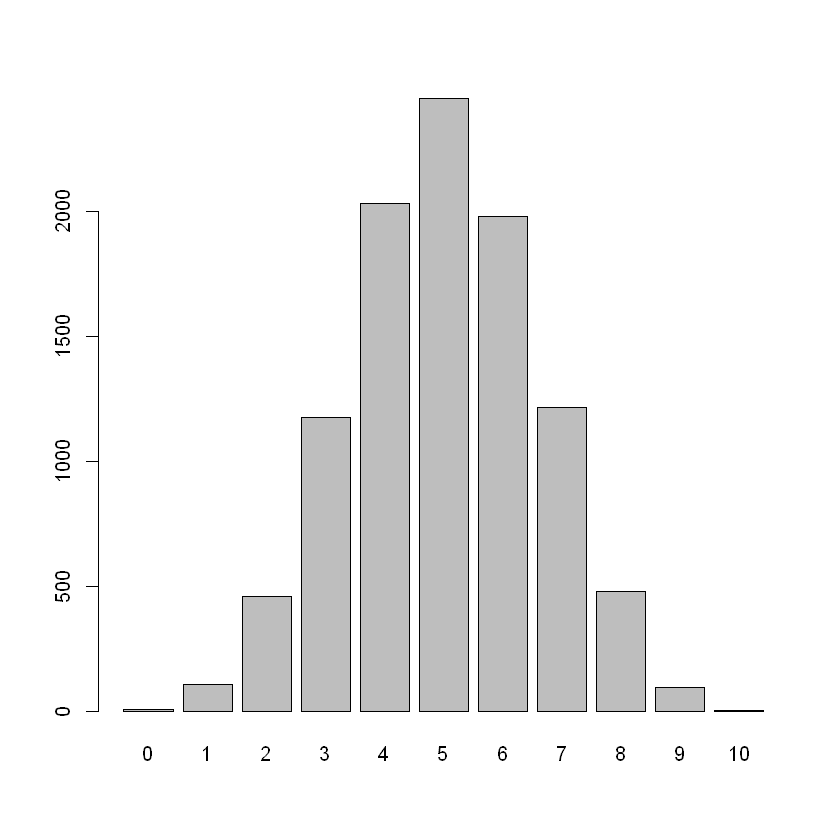

In [95]:
barplot(table(counts))

### 가장 가까운 값 찾기

In [96]:
set.seed(1)

In [97]:
xv = rnorm(1000, mean = 100, sd = 10)

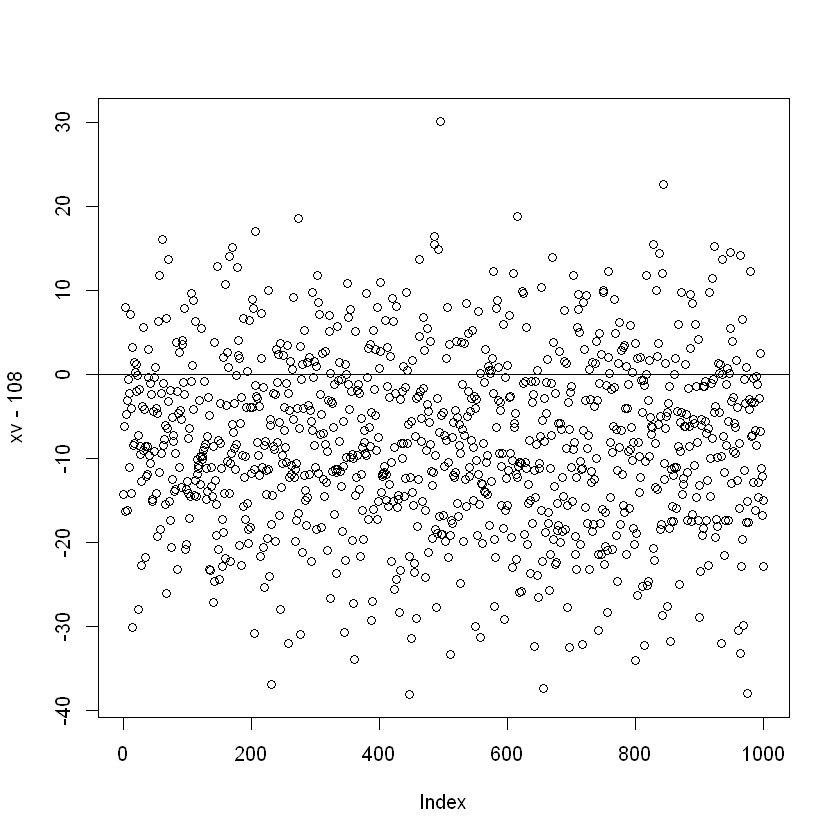

In [98]:
plot(xv - 108) # 108에 가장 가까운 값
abline(h = 0)

In [99]:
min(abs(xv-108))

[1] 0.03205461

In [100]:
# 가장 작은 오차를 가진 원소 위치 찾기
which( min(abs(xv-108)) == abs(xv-108))

[1] 817

In [101]:
(xv-108)[817]

[1] -0.03205461

In [102]:
xv[817]

[1] 107.9679

In [103]:
# 함수 만들기

closet = function(xv, sv){
    xv[which(min(abs(xv-sv)) == abs(xv-sv))]
}

In [104]:
closet(xv, 108)

[1] 107.9679

### 정렬(sorting)

In [105]:
set.seed(1)
x = round(rnorm(12, mean = 100, sd = 10))

In [106]:
ranks = rank(x)
sorted = sort(x)
ordered = order(x)

In [107]:
ranks

[1]  3.0  5.0  1.5 12.0  6.0  1.5  8.0 10.0  9.0  4.0 11.0  7.0

In [108]:
x

[1]  94 102  92 116 103  92 105 107 106  97 115 104

In [109]:
sort(ranks)

[1]  1.5  1.5  3.0  4.0  5.0  6.0  7.0  8.0  9.0 10.0 11.0 12.0

In [110]:
ordered

[1]  3  6  1 10  2  5 12  7  9  8 11  4

In [111]:
data.frame(x, ranks, sorted, ordered)

x,ranks,sorted,ordered
<dbl>,<dbl>,<dbl>,<int>
94,3.0,92,3
102,5.0,92,6
92,1.5,94,1
116,12.0,97,10
103,6.0,102,2
92,1.5,103,5
105,8.0,104,12
107,10.0,105,7
106,9.0,106,9


In [112]:
x[ordered[1]]

[1] 92

In [113]:
x[ordered]

[1]  92  92  94  97 102 103 104 105 106 107 115 116

In [114]:
x[ordered[2]]

[1] 92

In [115]:
x[ordered[3]]

[1] 94

### order() 함수의 유용성

- 지역별 주택 값이 있다. 가장 싼 지역에서 비싼 지역으로 정렬하고 싶다.

In [116]:
location <- c('Ascot', 'Sunninghill', 'Bracknell', 'Camberley', 'Bagshot'
              , 'Staines', 'Windsor', 'Maidenhead', 'Reading', 'Winkfield', 'Warfield', 'Newbury')

In [117]:
price <- c(325, 201, 157, 162, 164, 101, 211, 188, 95, 117, 188, 121)

In [118]:
location[which(price == min(price))]

[1] "Reading"

In [119]:
order(price)

[1]  9  6 10 12  3  4  5  8 11  2  7  1

In [120]:
location[rev(order(price))]

[1] "Ascot"       "Windsor"     "Sunninghill" "Warfield"    "Maidenhead" 
 [6] "Bagshot"     "Camberley"   "Bracknell"   "Newbury"     "Winkfield"  
[11] "Staines"     "Reading"

### unique(), duplicated()

In [121]:
names <- c("Williams","Smith","Jones","Williams","Jones","Williams")

In [122]:
table(names) # 빈도 계산

names
   Jones    Smith Williams 
       2        1        3 

In [123]:
unique(names) # 중복되지 않은 이름

[1] "Williams" "Smith"    "Jones"

In [124]:
duplicated(names) # 각 원소의 중복 여부

[1] FALSE FALSE FALSE  TRUE  TRUE  TRUE

In [125]:
names[ !duplicated(names) ] 

[1] "Williams" "Smith"    "Jones"

In [126]:
salary <- c(42,42,48,42,42,42)

In [127]:
mean(salary)

[1] 43

In [128]:
salary[!duplicated(names)]

[1] 42 42 48

In [129]:
mean(salary[!duplicated(names)])

[1] 44

In [130]:
mean(salary[!duplicated(salary)])

[1] 45

### 벡터 안에서 연속된 값 찾기

In [131]:
set.seed(1)

poisson <- rpois(150, 0.7)    # 평균이 0.7인 포아송 분포에서 난수 발생

In [132]:
poisson

[1] 0 0 1 2 0 2 2 1 1 0 0 0 1 0 1 1 1 3 0 1 2 0 1 0 0 0 0 0 2 0 0 1 0 0 1 1 1
 [38] 0 1 0 1 1 1 1 1 1 0 0 1 1 0 2 0 0 0 0 0 1 1 0 2 0 0 0 1 0 0 1 0 2 0 1 0 0
 [75] 0 2 2 0 1 2 0 1 0 0 1 0 1 0 0 0 0 0 1 2 1 1 0 0 1 1 1 0 0 3 1 0 0 0 2 1 3
[112] 1 0 0 0 0 1 0 0 1 3 0 0 0 1 0 1 0 0 1 1 0 0 1 2 1 1 1 3 1 1 1 0 0 1 0 0 1
[149] 0 2

In [133]:
table(poisson)

poisson
 0  1  2  3 
75 55 15  5 

In [134]:
rle(poisson)

Run Length Encoding
  lengths: int [1:90] 2 1 1 1 2 2 3 1 1 3 ...
  values : int [1:90] 0 1 2 0 2 1 0 1 0 1 ...

In [135]:
max(rle(poisson)[[1]])

[1] 6

In [136]:
which(rle(poisson)[[1]] == 6)

[1] 26

In [137]:
run_and_value = function(x){
    a = max(rle(x)[[1]])
    b = rle(x)[[2]][which(rle(x)[[1]]== a)]
    cat('length = ', a, 'value = ', b, '\n')
}

In [138]:
run_and_value(poisson)

length =  6 value =  1 


In [139]:
n1 = 25
n2 = 30

y = c(rep(1, n1), rep(0, n2))

In [140]:
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [141]:
set.seed(1)
sample(y)

[1] 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0
[39] 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1

In [142]:
len = numeric(10000)
len

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [143]:
for(i in 1:10000) len[i] = length(rle(sample(y))[[2]])

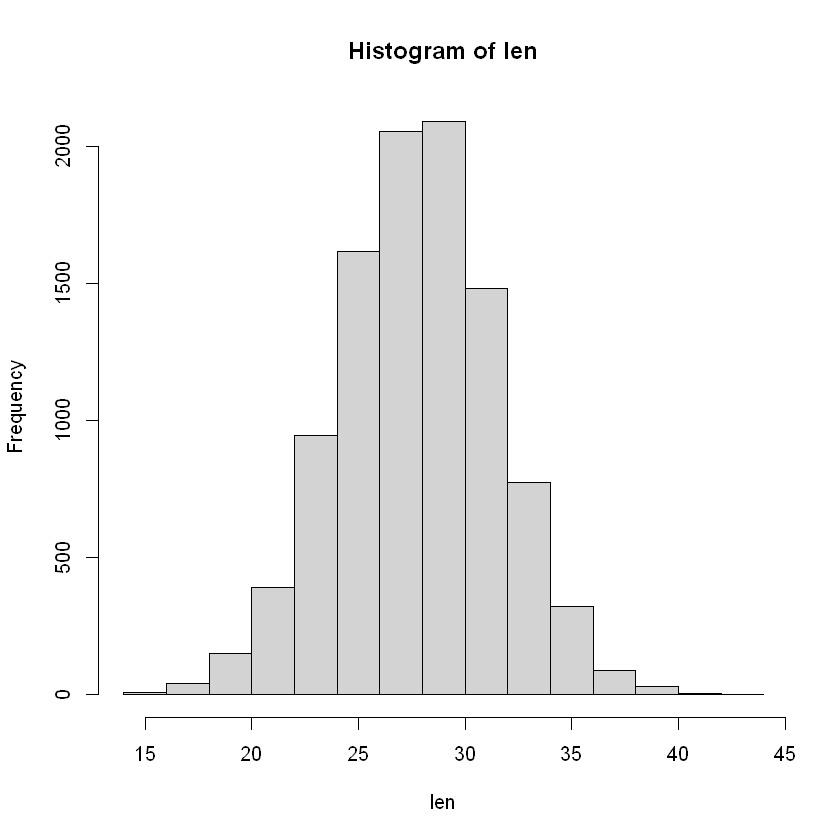

In [144]:
hist(len)

In [145]:
quantile(len, c(0.025, 0.975))

2.5% 97.5% 
   21    35

### union(), intersect(), setdiff()

`union()` : 합집합

`intersect()` : 교집합

`setdiff()` : 차집합

- 다음 두 집합의 합집합, 교집합, 집합차 등을 구한다.

In [146]:
setA <- c("a", "b", "c", "d", "e")
setB <- c("d", "e", "f", "g")

In [147]:
union(setA, setB)

[1] "a" "b" "c" "d" "e" "f" "g"

In [148]:
intersect(setA, setB)

[1] "d" "e"

In [149]:
setdiff(setB, setA) # setB에서 setA 빼기

[1] "f" "g"

In [150]:
all(c(setdiff(setA, setB), intersect(setA, setB), setdiff(setB, setA)) == union(setA, setB))

[1] TRUE

In [151]:
setequal(2,2)

[1] TRUE

In [152]:
setA %in% setB

[1] FALSE FALSE FALSE  TRUE  TRUE

In [153]:
setB %in% setA

[1]  TRUE  TRUE FALSE FALSE

In [154]:
setA[setA %in% setB]

[1] "d" "e"

## Ch.8 행렬과 배열

In [155]:
y = 1:24

In [156]:
dim(y) = c(2, 4, 3)

In [157]:
print(y)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    3    5    7
[2,]    2    4    6    8

, , 2

     [,1] [,2] [,3] [,4]
[1,]    9   11   13   15
[2,]   10   12   14   16

, , 3

     [,1] [,2] [,3] [,4]
[1,]   17   19   21   23
[2,]   18   20   22   24



In [158]:
dim(y) = c(3,2,4)

In [159]:
print(y)

, , 1

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

, , 2

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

, , 3

     [,1] [,2]
[1,]   13   16
[2,]   14   17
[3,]   15   18

, , 4

     [,1] [,2]
[1,]   19   22
[2,]   20   23
[3,]   21   24



In [160]:
X = matrix(1:9, nrow = 3)
X

1,4,7
2,5,8
3,6,9


In [161]:
X2 = matrix(1:9, ncol = 3)
X2

1,4,7
2,5,8
3,6,9


In [162]:
class(X)

[1] "matrix" "array"

In [163]:
attributes(X)

$dim
[1] 3 3

- 데이터를 행별로 넣고 싶다면 `byrow = T` 옵션을 사용한다.

In [164]:
vector = c(1,2,3,4,4,3,2,1)

In [165]:
V = matrix(vector, byrow = TRUE, nrow = 2)

In [166]:
V

1,2,3,4
4,3,2,1


In [167]:
dim(vector) <- c(4,2)

In [168]:
vector

1,4
2,3
3,2
4,1


### 행렬에서 열과 행의 이름

In [169]:
set.seed(1)
X = matrix(rpois(20, 1.5), nrow =4)
X

1,0,2,2,2
1,3,0,1,5
2,4,0,2,1
3,2,0,1,2


In [170]:
rownames(X) = rownames(X, do.NULL = FALSE, prefix = 'Trial')

In [171]:
rownames(X)

[1] "Trial1" "Trial2" "Trial3" "Trial4"

In [172]:
X

Trial1,1,0,2,2,2
Trial2,1,3,0,1,5
Trial3,2,4,0,2,1
Trial4,3,2,0,1,2


In [173]:
drug.names = c('aspirin', 'paracetamol', 'nurofen', 'hedex', 'placebo')

In [174]:
colnames(X) = drug.names
X

,aspirin,paracetamol,nurofen,hedex,placebo
Trial1,1,0,2,2,2
Trial2,1,3,0,1,5
Trial3,2,4,0,2,1
Trial4,3,2,0,1,2


In [175]:
dimnames(X) = list(paste('row.', 1:4, sep=''), paste('drug.', 1:5, sep = ''))

In [176]:
dimnames(X)

[[1]]
[1] "row.1" "row.2" "row.3" "row.4"

[[2]]
[1] "drug.1" "drug.2" "drug.3" "drug.4" "drug.5"

In [177]:
X

,drug.1,drug.2,drug.3,drug.4,drug.5
row.1,1,0,2,2,2
row.2,1,3,0,1,5
row.3,2,4,0,2,1
row.4,3,2,0,1,2


### 행과 열의 계산

In [178]:
set.seed(1)
X = matrix(rpois(20,1.5), nrow = 4)

In [179]:
X

1,0,2,2,2
1,3,0,1,5
2,4,0,2,1
3,2,0,1,2


In [180]:
mean(X[,5])

[1] 2.5

In [181]:
var(X[4,])

[1] 1.3

In [182]:
rowSums(X)

[1]  7 10  9  8

In [183]:
colSums(X)

[1]  7  9  2  6 10

In [184]:
rowMeans(X)

[1] 1.4 2.0 1.8 1.6

In [185]:
colMeans(X)

[1] 1.75 2.25 0.50 1.50 2.50

- apply

In [186]:
apply(X, 2, mean)

[1] 1.75 2.25 0.50 1.50 2.50

In [187]:
group = c('A', 'B', 'B', 'A')

In [188]:
rowsum(X, group)

A,4,2,2,3,4
B,3,7,0,3,6


In [189]:
tapply(X, list(group[row(X)], col(X)), sum)

,1,2,3,4,5
A,4,2,2,3,4
B,3,7,0,3,6


In [190]:
aggregate(X, list(group), sum)

Group.1,V1,V2,V3,V4,V5
<chr>,<int>,<int>,<int>,<int>,<int>
A,4,2,2,3,4
B,3,7,0,3,6


In [191]:
RNGkind(sample.kind = 'Rejection')
set.seed(1)
apply(X, 2, sample)

1,0,0,2,5
2,4,0,1,2
3,2,2,1,2
1,3,0,2,1


### 행렬에 행 또는 열을 추가

In [192]:
X = rbind(X, apply(X, 2, mean)) # 열별로 평균을 계산하여 마지막 행에 추가

In [193]:
X = cbind(X, apply(X, 1, var)) # 행별로 분산을 계산하여 마지막 열에 추가

In [194]:
X

1.00,0.00,2.0,2.0,2.0,0.80000
1.00,3.00,0.0,1.0,5.0,4.00000
2.00,4.00,0.0,2.0,1.0,2.20000
3.00,2.00,0.0,1.0,2.0,1.30000
1.75,2.25,0.5,1.5,2.5,0.60625


In [195]:
colnames(X) = c(1:5, 'variance')

In [196]:
rownames(X) = c(1:4, 'mean')

In [197]:
X

,1,2,3,4,5,variance
1,1.00,0.00,2.0,2.0,2.0,0.80000
2,1.00,3.00,0.0,1.0,5.0,4.00000
3,2.00,4.00,0.0,2.0,1.0,2.20000
4,3.00,2.00,0.0,1.0,2.0,1.30000
mean,1.75,2.25,0.5,1.5,2.5,0.60625


### sapply() 함수 응용

In [198]:
x = seq(0, 50, 2)
y <- c(1, 0.960235403, 0.844663774, 0.706936329, 0.7086414, 0.609795365, 0.513252644, 0.471399685, 0.384081274, 0.372277798, 0.334087432, 0.273307329, 0.25162333, 0.222786515, 0.210216526, 0.190591821, 0.166907195, 0.140731643, 0.12028785, 0.116460713, 0.092736872, 0.083972607, 0.088291404, 0.071790589, 0.059327414, 0.061706234)

In [199]:
x
y

[1]  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
[26] 50

[1] 1.00000000 0.96023540 0.84466377 0.70693633 0.70864140 0.60979536
 [7] 0.51325264 0.47139969 0.38408127 0.37227780 0.33408743 0.27330733
[13] 0.25162333 0.22278651 0.21021653 0.19059182 0.16690720 0.14073164
[19] 0.12028785 0.11646071 0.09273687 0.08397261 0.08829140 0.07179059
[25] 0.05932741 0.06170623

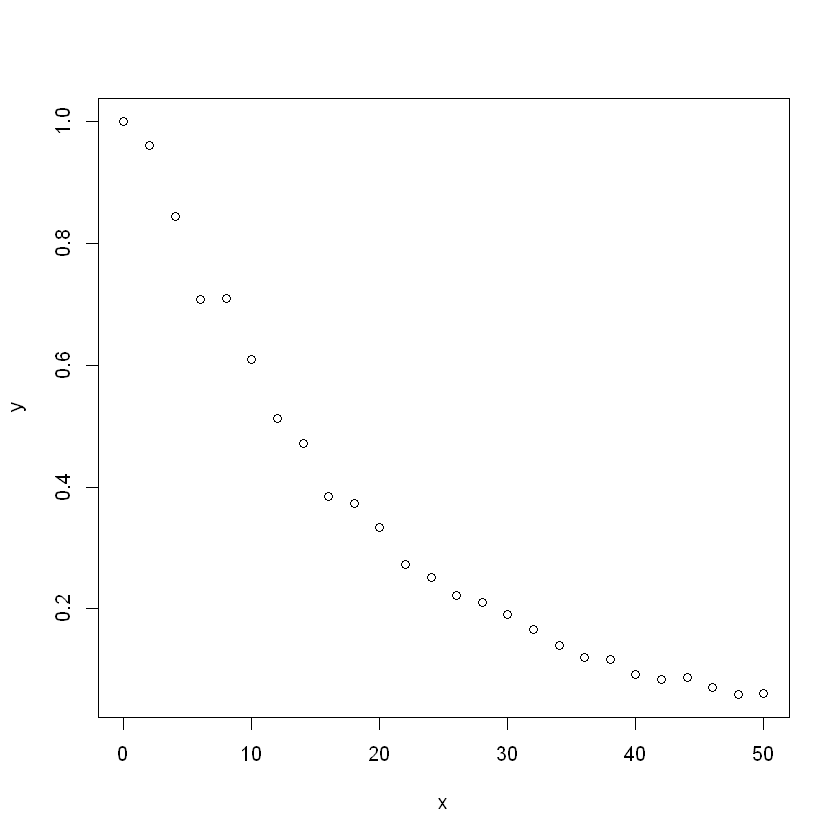

In [200]:
plot(x, y)

In [201]:
lm(log(y) ~ x)


Call:
lm(formula = log(y) ~ x)

Coefficients:
(Intercept)            x  
    0.04688     -0.05849  


In [202]:
a = seq(0.01, 0.2, 0.005)
a

[1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200

In [203]:
sumsq = function(a, xv=x, yv=y){
    yf = exp(-a*xv)
    sum((yv-yf)^2)
}

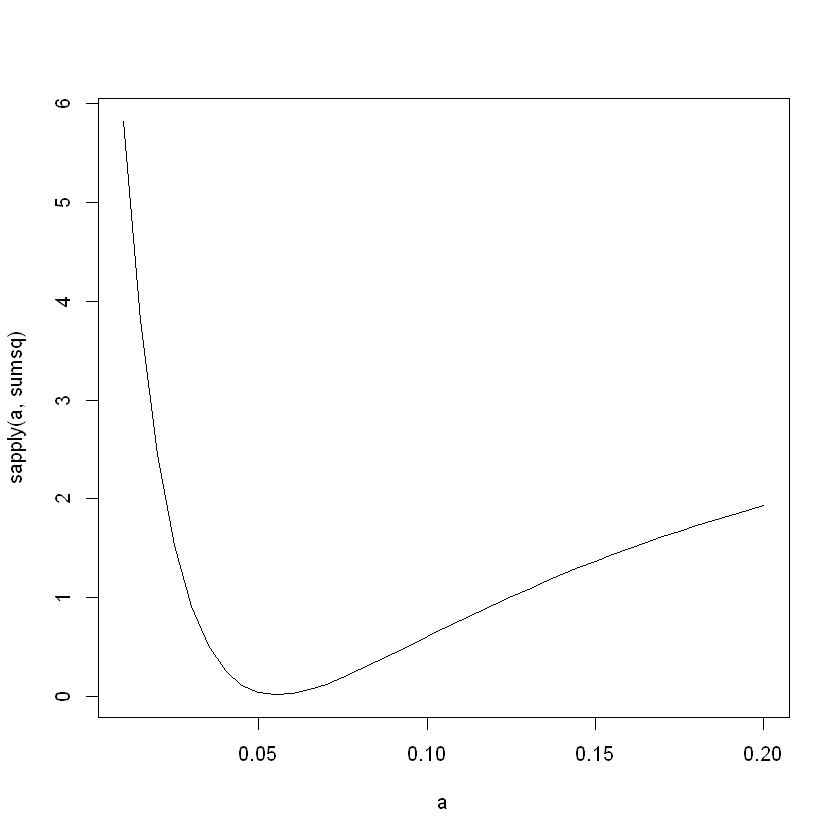

In [204]:
plot(a, sapply(a, sumsq), type="l")

In [ ]:
a[min(sapply(a, sumsq)) == sapply(a, sumsq) ]

[1] 0.055

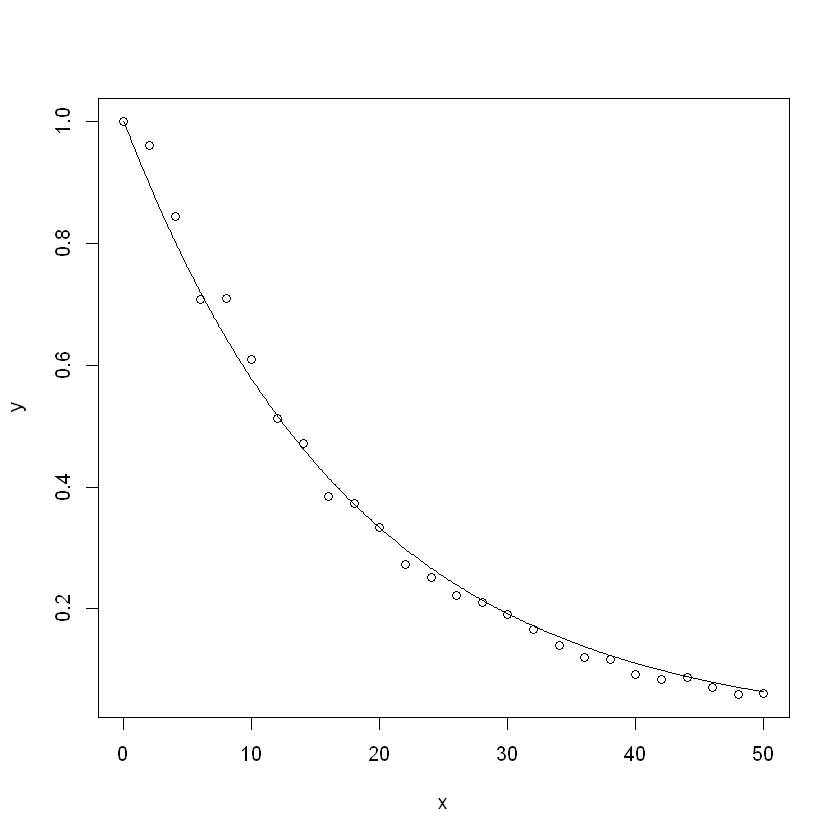

In [206]:
plot(x,y)
xv = seq(0, 50, 0.1)
lines(xv, exp(-0.055*xv))

In [207]:
fa <- function(a) sum((y - exp(-a*x))^2)

In [208]:
optimize(fa, c(0.01, 0.1))

$minimum
[1] 0.05538411

$objective
[1] 0.01473559

In [209]:
fa(0.05538)

[1] 0.01473568

## Ch9. 난수, 표집, 뒤섞기

In [232]:
set.seed(375)
runif(3)

[1] 0.9613669 0.6918535 0.7302684

In [233]:
y = c(8,3,5,7,6,6,8,9,2,3,9,4,10,4,11)
sample(y)

[1]  8  4 11  4  3  9  7  6  2  6  5  3  8  9 10

In [237]:
set.seed(1)
sample(y)

[1]  2  7  8  8  3 10  9  5  9  4  6  6 11  3  4

In [238]:
set.seed(1)
sample(y, 5)

[1] 2 7 8 8 3

In [243]:
set.seed(1)
sample(y, replace = TRUE) # 복원 추출

[1]  2  7  8  8  3 10  8  9  4  3  9  5  8  6  6

In [246]:
x = 1:5 # 모집단 
p = c(1,2,3,4,5) # 1은 1/15확률, 2는 2/15 확률, 3은 3/15 확률, ...

In [251]:
set.seed(1)
sapply(1:5, function(i) sample(x, 4, prob=p))

5,5,3,3,3
4,2,5,5,1
2,1,4,2,5
1,3,2,4,2


In [253]:
set.seed(1)
sapply(1:5, function(i) sample(x, 4, prob=p, replace = TRUE))

5,5,3,3,3
4,2,5,4,1
4,1,5,3,4
2,3,5,4,3


## Ch.10 루핑과 반복

In [254]:
for (i in 1:5) print(i^2)

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25


In [258]:
j <- k <- 0

In [259]:
for (i in 1:5){
    j = j + 1
    k = k + i*j
    print(i+j+k)
}

[1] 3
[1] 9
[1] 20
[1] 38
[1] 65


In [260]:
fac1 = function(x){
    f = 1
    if (x<2) return(1) # 0! = 1! = 1
    
    for (i in 2:x){
        f = f*i
    }
    f
}

In [263]:
sapply(0:5, fac1)

[1]   1   1   2   6  24 120

In [264]:
fac2 = function(x){
    f = 1
    t = x
    while(t>1){
        f = f * t
        t = t - 1
    }
    return(f)
}

In [265]:
sapply(0:5, fac2)

[1]   1   1   2   6  24 120

In [266]:
fac3 = function(x){
    f = 1
    
    repeat{
        if (x<2) break
        f = f * x
        x = x - 1
    }
    return(f)
}

In [267]:
sapply(0:5, fac3)

[1]   1   1   2   6  24 120

In [269]:
cumprod(1:5)

[1]   1   2   6  24 120

In [270]:
cumprod(1:0)

[1] 1 0

In [271]:
max(cumprod(1:0))

[1] 1

In [275]:
fac4 = function(x) max(cumprod(1:x))

In [276]:
sapply(0:5, fac4)

[1]   1   1   2   6  24 120

In [278]:
# Gamma 함수 적용

$\Gamma (x+1) = x!$

In [279]:
fac5 = function(x) gamma(x+1)
sapply(0:5, fac5)

[1]   1   1   2   6  24 120

In [280]:
sapply(0:5, factorial) # R 내장 팩토리얼 함수

[1]   1   1   2   6  24 120

### 루핑을 피하기

- 루핑은 가급적 피하는 것이 좋다. 벡터 함수를 잘 이용하면 루핑을 피할 수 있다.

### ifelse()

In [283]:
Area <- c(3.6, 5.1, 2.8, 2.4, 3.8, 3.1, 3.5, 2.1, 1.9, 1.5, 2.9, 3.3, 3.7, 1.8, 4.1, 3.9, 2.2, 4.4, 2.9, 0.8)

In [284]:
ifelse(Area > median(Area), 'big', 'small')

[1] "big"   "big"   "small" "small" "big"   "big"   "big"   "small" "small"
[10] "small" "small" "big"   "big"   "small" "big"   "big"   "small" "big"  
[19] "small" "small"

In [288]:
set.seed(1)
y = log(rpois(20, 1.5))
y

[1] 0.0000000 0.0000000 0.6931472 1.0986123      -Inf 1.0986123 1.3862944
 [8] 0.6931472 0.6931472      -Inf      -Inf      -Inf 0.6931472 0.0000000
[15] 0.6931472 0.0000000 0.6931472 1.6094379 0.0000000 0.6931472

In [289]:
ifelse(y<0, NA, y) # 음수는 결측값 처리

[1] 0.0000000 0.0000000 0.6931472 1.0986123        NA 1.0986123 1.3862944
 [8] 0.6931472 0.6931472        NA        NA        NA 0.6931472 0.0000000
[15] 0.6931472 0.0000000 0.6931472 1.6094379 0.0000000 0.6931472

### 루핑에 걸리는 시간

In [292]:
x <- runif(10000000)

In [293]:
system.time(max(x))

 사용자  시스템 elapsed 
   0.02    0.00    0.01 

In [298]:
pc = proc.time()
cmax = x[1]

for (i in 2:10000000){
    if (x[i] == cmax) cmax = x[i]
}
proc.time() - pc

 사용자  시스템 elapsed 
   0.28    0.00    0.28 

## Ch.11 리스트

In [300]:
apples <- c(4,4.5,4.2,5.1,3.9)
oranges <- c(TRUE, TRUE, FALSE)
chalk <- c("limestone", "marl","oolite", "CaC03")

- 길이가 달라서 데이터 프레임으로 만들 수 없다.
- 리스트는 만들 수 있다.

In [303]:
items = list(apples, oranges, chalk)
print(items)

[[1]]
[1] 4.0 4.5 4.2 5.1 3.9

[[2]]
[1]  TRUE  TRUE FALSE

[[3]]
[1] "limestone" "marl"      "oolite"    "CaC03"    



In [304]:
items[[1]]

[1] 4.0 4.5 4.2 5.1 3.9

In [305]:
items[[2]][3]

[1] FALSE

In [306]:
names(items)

NULL

In [311]:
items = list(first = apples, second = oranges, third=chalk)
names(items)

[1] "first"  "second" "third"

In [312]:
items

$first
[1] 4.0 4.5 4.2 5.1 3.9

$second
[1]  TRUE  TRUE FALSE

$third
[1] "limestone" "marl"      "oolite"    "CaC03"

In [309]:
names(items) = c('aa', 'bb', 'ww')

In [310]:
items

$aa
[1] 4.0 4.5 4.2 5.1 3.9

$bb
[1]  TRUE  TRUE FALSE

$ww
[1] "limestone" "marl"      "oolite"    "CaC03"

In [313]:
items$first

[1] 4.0 4.5 4.2 5.1 3.9

### lapply()

- lapply returns a list of the same length as X, each element of which is the result of applying FUN to the corresponding element of X.

In [314]:
class(items)

[1] "list"

In [315]:
is.numeric(items)

[1] FALSE

In [316]:
is.list(items)

[1] TRUE

In [317]:
length(items)

[1] 3

In [320]:
lapply(items, length)

$first
[1] 5

$second
[1] 3

$third
[1] 4

In [321]:
lapply(items, class)

$first
[1] "numeric"

$second
[1] "logical"

$third
[1] "character"

In [322]:
lapply(items, mean)

Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"


$first
[1] 4.34

$second
[1] 0.6666667

$third
[1] NA

In [323]:
str(items)

List of 3
 $ first : num [1:5] 4 4.5 4.2 5.1 3.9
 $ second: logi [1:3] TRUE TRUE FALSE
 $ third : chr [1:4] "limestone" "marl" "oolite" "CaC03"
